강의 링크: https://youtu.be/TNcfJHajqJY

In [ ]:
#버전 조회, 업데이트

import sklearn
sklearn.__version__
!pip install scikit-learn --user --upgrade

'1.0.2'

#0. 다양한 평가 지표 (회귀모델)
- MAE (Mean Absolute Error) : (실제 값과 예측 값) 차이의 절대값을, 다 더해서 평균.
- MSE (Mean Squared Error) : 차이의 제곱을, 다 더해서 평균.
- RMSE (Root Mean Squared Error) : 차이의 제곱에 루트를, 다 더해서 평균.
- R2 : 결정 계수. 1-(SSE/SST) = SSR/SST. R2 는 1에 가까울수록, 나머지는 0에 가까울수록 좋음


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred) # 실제 값, 예측 값 # MAE 3.2253285188288023

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) # MSE 19.900226981515015

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False) # RMSE 4.460967045553578

from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # R2 0.9859956178877445

0.9859956178877446

#1. 선형회귀 (Linear Regression) y=mx+b
- 선형회귀법은 최소제곱법(OLS)을 해야 함. 즉, 잔차제곱의합(RSS = SSR)인 (실제값-예측값)²을 최소화하는 것

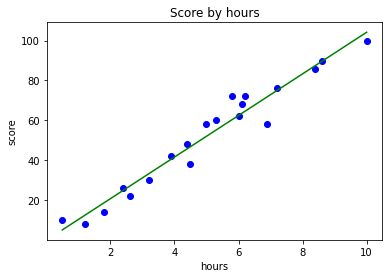

In [ ]:
#전체적인 선형회귀 구현 방법
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('LinearRegressionData.csv')

X = dataset.iloc[:, :-1].values 
# 처음부터 마지막까지 행, 마지막 직전 컬럼까지 데이터 (독립 변수 - 원인)
y = dataset.iloc[:, -1].values 
# 처음부터 마지막까지 행, 마지막만 컬럼 데이터 (종속 변수 - 결과)

from sklearn.linear_model import LinearRegression  # 선형회귀
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 학습 (모델 생성)
y_pred = reg.predict(X) # X 에 대한 예측 값

plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, y_pred, color='green') # 선 그래프
plt.title('Score by hours') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

reg.coef_          #기울기(m): array([10.44369694])
reg.intercept_     #y절편(b): y=10.4436x - 0.2184
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]]))     # [93.77478776]

In [ ]:
#데이터 세트 분리 (훈련,검증)

import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('LinearRegressionData.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
# 훈련 80 : 테스트 20 으로 분리


X, len(X) # 전체 데이터 X, 개수 20
X_train, len(X_train) # 훈련 세트 X, 개수 16
X_test, len(X_test) # 테스트 세트 X, 개수 4
y, len(y) # 전체 데이터 y 20
y_train, len(y_train) # 훈련 세트 y 16
y_test, len(y_test) # 테스트 세트 y 4

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]), 20)

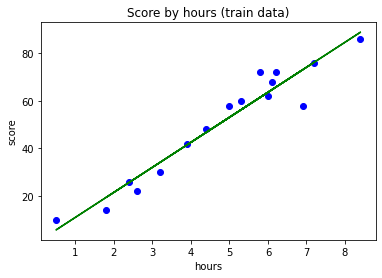

In [ ]:
#훈련 데이터 학습

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train) 

plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

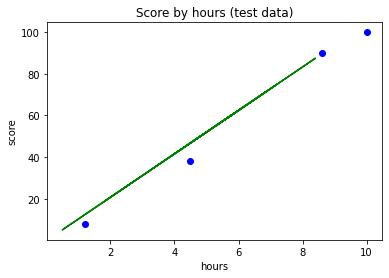

In [ ]:
#검증 데이터 학습

plt.scatter(X_test, y_test, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (test data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [ ]:
#모델 평가

reg.coef_       #array([10.49161294])
reg.intercept_    #0.6115562905169796

#2. 경사하강법 (Gradient Descent)
- 경사하강법이란 경사에 따라 하강하다가 멈추는 것.
- 학습률: 경사에 따라 내려가는 정도. 너무 크거나 적지도 않고 적당한 값을 정하는 것이 중요함.
- 에포크(Epoch): 최적의 값을 찾기 위해 훈련 세트에 있는 모든 데이터를 한번씩 사용하는 것.

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


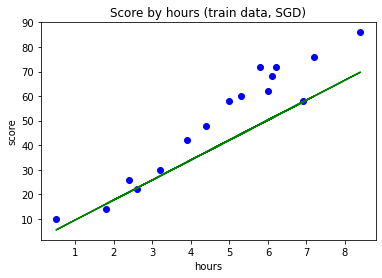

In [ ]:
#기본적 구현
from sklearn.linear_model import SGDRegressor 
     #SGD : Stochastic Gradient Descent 확률적 경사 하강법
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)
     #max_iter(Epoch횟수), eta0(학습률)
sr.fit(X_train, y_train)

plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, sr.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train data, SGD)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

sr.coef_, sr.intercept_ #기울기,  y절편
#(array([10.2062811]), array([1.95017289]))
#SGDRegressor() 객체를 생성할 때 random_state 값을 지정하지 않았으므로 결과가 다르게 나타날 수 있음

In [ ]:
sr.score(X_train, y_train) #훈련세트를 통한 모델 평가: 0.9349740699430755
sr.score(X_test, y_test) #검증세트를 통한 모델 평가: 0.9732274354250781

0.884872663907813

#3. 다중 선형 회귀 (Multiple Linear Regression)   y=b+m1x1+m2x2+...+mnxn

1) 원-핫 인코딩
- 범주형 데이터를 1 또는 0 으로 수정해주는 것. 예)공부장소

2) 다중 공선성
- 관계없는 D1, D2, D3 사이에 상관관계가 D3=1-(D1+D2)처럼 생길 경우, D3을 제외하고 (1,0), (0,1), (0,0)으로 나타내는 것.

In [ ]:
#원핫인코딩, 다중공선성

import pandas as pd
dataset = pd.read_csv('MultipleLinearRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder  
     #place를 원핫 인코딩
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [2])], remainder='passthrough')
     #drop='first' 경우 3개 중 2개만 써서 다중공선성 문제 해결. [2]번째꺼를 drop함.
     #원핫인코딩 하지 않는 나머지 칼럼은 그대로 둠. (hour:시간, absent: 결석일수 는 그대로.)
X = ct.fit_transform(X)
X

# array([[1.0, 0.0, 0.5, 3]
# 1 0 : Home
# 0 1 : Library
# 0 0 : Cafe

array([[1.0, 0.0, 0.5, 3],
       [0.0, 1.0, 1.2, 4],
       [0.0, 0.0, 1.8, 2],
       [0.0, 0.0, 2.4, 0],
       [1.0, 0.0, 2.6, 2],
       [1.0, 0.0, 3.2, 0],
       [0.0, 1.0, 3.9, 0],
       [0.0, 1.0, 4.4, 0],
       [1.0, 0.0, 4.5, 5],
       [0.0, 0.0, 5.0, 1],
       [0.0, 0.0, 5.3, 2],
       [0.0, 0.0, 5.8, 0],
       [0.0, 1.0, 6.0, 3],
       [0.0, 0.0, 6.1, 1],
       [0.0, 1.0, 6.2, 1],
       [1.0, 0.0, 6.9, 4],
       [0.0, 0.0, 7.2, 2],
       [1.0, 0.0, 8.4, 1],
       [0.0, 1.0, 8.6, 1],
       [0.0, 1.0, 10.0, 0]], dtype=object)

In [ ]:
#데이터 세트 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#모델링 학습
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

#y절편, 기울기 등
y_pred = reg.predict(X_test)   #array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204])
                               #y_test: array([ 90,   8, 100,  38], dtype=int64)
reg.coef_   #array([-5.82712824, -1.04450647, 10.40419528, -1.64200104])
reg.intercept_  #5.365006706544747

5.365006706544776

In [ ]:
reg.score(X_train, y_train) # 훈련 세트평가: 0.9623352565265527
reg.score(X_test, y_test) # 테스트 세트평가: 0.9859956178877445

#4. 다항회귀 (Polynomial Regression)  y=b+m1x+m2x²+...

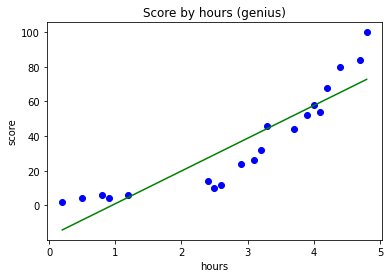

In [ ]:
#공부 시간에 따른 시험 점수 (우등생)
#3-1. 단순 선형 회귀 (Simple Linear Regression)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('PolynomialRegressionData.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) # 전체 데이터로 학습

plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, reg.predict(X), color='green') # 선 그래프
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

reg.score(X, y) # 전체 데이터를 통한 모델 평가 : 0.8169296513411765

In [ ]:
X

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2],
       [2.4],
       [2.5],
       [2.6],
       [2.9],
       [3.1],
       [3.2],
       [3.3],
       [3.7],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.4],
       [4.7],
       [4.8]])

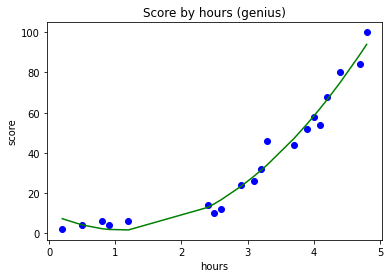

In [ ]:
#다항 회귀 (Polynomial Regression)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) # 2차
X_poly = poly_reg.fit_transform(X)   #X_poly[:5]: 5번째까지 [x^0, x^1, x^2] 출력
 # poly_reg.get_feature_names_out() : array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4']

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)    #모델생성(학습)

plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='green')
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

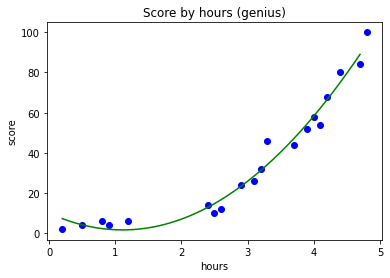

In [ ]:
X_range = np.arange(min(X), max(X), 0.1) 
  # X의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range                          #array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, ... , 4.7]) = shape(46,)
X_range = X_range.reshape(-1, 1) # row 개수는 자동으로 계산, column 개수는 1개 = shape(46,1)

plt.scatter(X, y, color='blue')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color='green')
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [ ]:
#평가 / 공부 시간에 따른 시험 성적 예측
reg.predict([[2]]) # 2시간을 공부했을 때 선형 회귀 모델의 예측: array([19.85348988])
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부했을 때 다항 회귀 모델의 예측: array([8.70559135])
lin_reg.score(X_poly, y): 0.9782775579000045

#5. 로지스틱 회귀 (Logistic Regression)  P=1/(1+e^-x)
- 주어진 데이터를 정해진 범주에 따라 분류.

In [ ]:
#공부 시간에 따른 자격증 시험 합격 가능성
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#학습 (로지스틱 회귀 모델)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

classifier.predict([[6]])          #6시간 공부했을 때 합격할 것으로 예측: array([1])
classifier.predict_proba([[6]])    #합격할 확률: 불합격 확률 14%, 합격 확률 86%: array([[0.14150735, 0.85849265]])
classifier.predict([[4]])          #4시간 공부했을 때 불합격: array([0])
classifier.predict_proba([[4]])    #합격할 확률: 불합격 확률 62%, 합격 확률 38%: array([[0.6249966, 0.3750034]])

y_pred = classifier.predict(X_test)  #예측 값: array([1, 0, 1, 1]
y_test                               #실제 값(테스트 세트): array([1, 0, 1, 0]
X_test                               #공부 시간(테스트 세트): array([[ 8.6], [ 1.2], [10. ], [ 4.5]])

classifier.score(X_test, y_test)      #모델 평가: 전체 테스트 세트 4개 중에서 분류 예측을 올바로 맞힌 개수 3개 -> 3/4 : 0.75

0.75

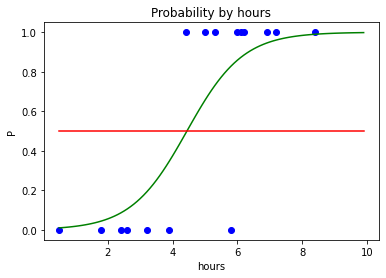

In [ ]:
#데이터 시각화(훈련 세트)

X_range = np.arange(min(X), max(X), 0.1) 
#X의 최소값에서 최대값까지를 0.1 단위로 잘라서 데이터 생성 (0.5~9.9)

p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_))) 
p = p.reshape(-1) # 1차원 배열 형태로 변경

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range 개수만큼 0.5 로 가득찬 배열 만들기
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

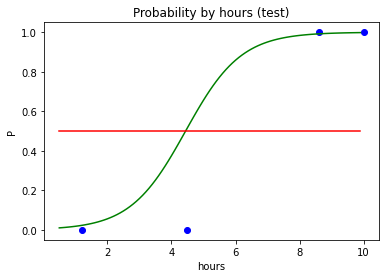

In [ ]:
#데이터 시각화 (테스트 세트)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range 개수만큼 0.5 로 가득찬 배열 만들기
plt.title('Probability by hours (test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

classifier.predict_proba([[4.5]]) 
#4.5시간 공부했을 때 확률 (모델에서는 51% 확률로 합격 예측, 실제로는 불합격): array([[0.48310686, 0.51689314]])

#6. 혼동행렬 (Confusion Matrix)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

#                  예측-불합격              예측-합격
# 실제-불합격   TRUE NEGATIVE (TN)       FALSE POSITIVE (FP)
# 실제-합 격    FALSE NEGATIVE (FN)      TRUE POSITIVE (TP)

#array([[1, 1],
#       [0, 2]], dtype=int64)
#4개 중에서, TN=1, FP=1, TP=2. 

#비지도학습
#1. k-평균 (K-Means)
- k값을 설정 후, 지정된 k개 만큼 랜덤 좌표를 설정하고, 모든 데이터로부터 가장 가까운 중심점을 선택. 데이터들의 평균 중심으로 중심점을 이동하고, 중심점이 더이상 이동되지 않을 때까지 반복함.

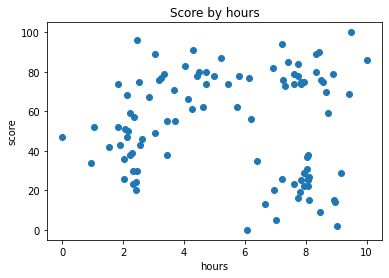

In [ ]:
import os    #경고대응
os.environ['OMP_NUM_THREADS'] = '1'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('KMeansData.csv')
X = dataset.iloc[:, :].values  # 비지도학습이므로 y는 없음

#데이터 시각화(전체)
plt.scatter(X[:, 0], X[:, 1]) # x축:hour, y축:score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

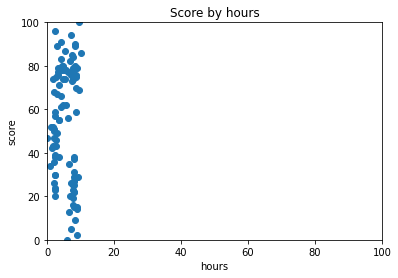

In [ ]:
#데이터 시각화 (축 범위 통일)
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.xlim(0, 100)
plt.ylabel('score')
plt.ylim(0, 100)
plt.show()

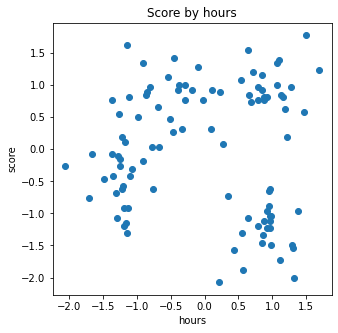

In [ ]:
#피처 스케일링 (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]  #array([[ 0.68729921,  0.73538376],...

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

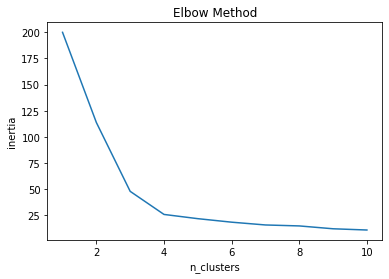

In [ ]:
#최적의 K 값 찾기 (엘보우 방식 Elbow Method)

from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid) 까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

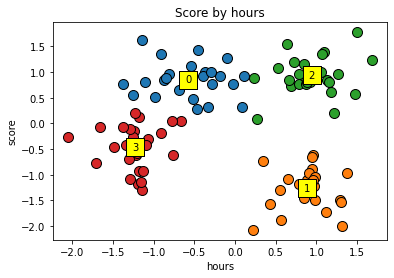

In [ ]:
#최적의 K(4) 값으로 KMeans 학습

K = 4       #최적의 K 값
kmeans = KMeans(n_clusters=K, random_state=0)   #kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)   #0~3 사이의 값을 가져옴

centers = kmeans.cluster_centers_     #클러스터의 중심점 (centroid) 좌표
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

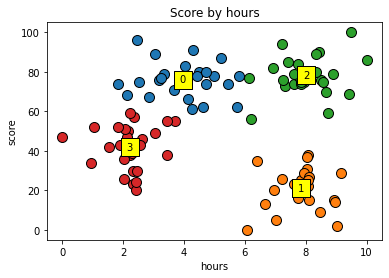

In [ ]:
#데이터 시각화 (스케일링 원복)

X_org = sc.inverse_transform(X)    #Feature Scaling 된 데이터를 다시 원복
centers_org = sc.inverse_transform(centers)

for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

#프로젝트
#1. 인구 통계학적 필터링